In [71]:
import numpy as np
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
def getBoundingRect(image, cutoff=100):
    x = makeMono(image, cutoff)
    dust = 12
    width, height = image.size

    # Get top and bottom.
    top = next(n for n in range(height) if sum(x[n]) < 255*(width-dust))
    bottom = next(n for n in range(height-1, 0, -1) if sum(x[n]) < 255*(width-dust))

    # Get left and right.
    y = x.transpose()
    left = next(n for n in range(width) if sum(y[n]) < 255*(height-dust))
    right = next(n for n in range(width-1, 0, -1) if sum(y[n]) < 255*(height-dust))

    return (left, top, right, bottom)

In [41]:
def deskew(image):
    # Convert to grayscale and invert.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    
    # Threshold.
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    # Get bounding box.
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    
    # Fix angle.
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    
    # Rotate to deskew.
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return rotated, angle

In [42]:
for filepath in sorted(glob("cut/*.*.[Jj][Pp][Gg]")):
    filename = os.path.basename(filepath)
    image = cv2.imread(filepath)
    rotated, angle = deskew(image)

    print("{} = {}".format(filename, angle))
    
    cv2.imwrite("rotated/" + filename, rotated)

01-02.0000000.jpg = -3.842559814453125
01-02.0000001.jpg = 1.7524642944335938
01-02.0000002.jpg = -0.0724945068359375
01-02.0000003.jpg = 0.5577289462089539
01-02.0000004.jpg = -1.4360122680664062
01-02.0000005.jpg = -0.3129730224609375
01-02.0000006.jpg = -0.4103851318359375
01-02.0000007.jpg = 0.09076552093029022
01-02.0000008.jpg = 0.4828980267047882
01-02.0000009.jpg = -0.39972686767578125
01-02.0000010.jpg = 0.047786299139261246
01-02.0000011.jpg = 0.2171655297279358
01-02.0000012.jpg = -1.6272811889648438
01-02.0000013.jpg = -0.6649169921875
01-02.0000014.jpg = 0.6725983023643494
01-02.0000015.jpg = 0.35367318987846375
01-02.0000016.jpg = 0.23853227496147156
03-04.0000001.jpg = -0.784820556640625
03-04.0000002.jpg = -1.190277099609375
03-04.0000003.jpg = 0.025867169722914696
03-04.0000004.jpg = -0.01169586181640625
03-04.0000005.jpg = 0.3455674648284912
03-04.0000006.jpg = 0.06114808842539787
03-04.0000007.jpg = 2.509108781814575
03-04.0000008.jpg = 1.977420687675476
03-04.000000

[[[1745 5129]]

 [[1744 5129]]

 [[1743 5128]]

 [[1743 5127]]

 [[1745 5127]]]
[[[3140 5044]]

 [[3139 5045]]

 [[3140 5046]]

 [[3141 5046]]

 [[3142 5045]]

 [[3141 5044]]]


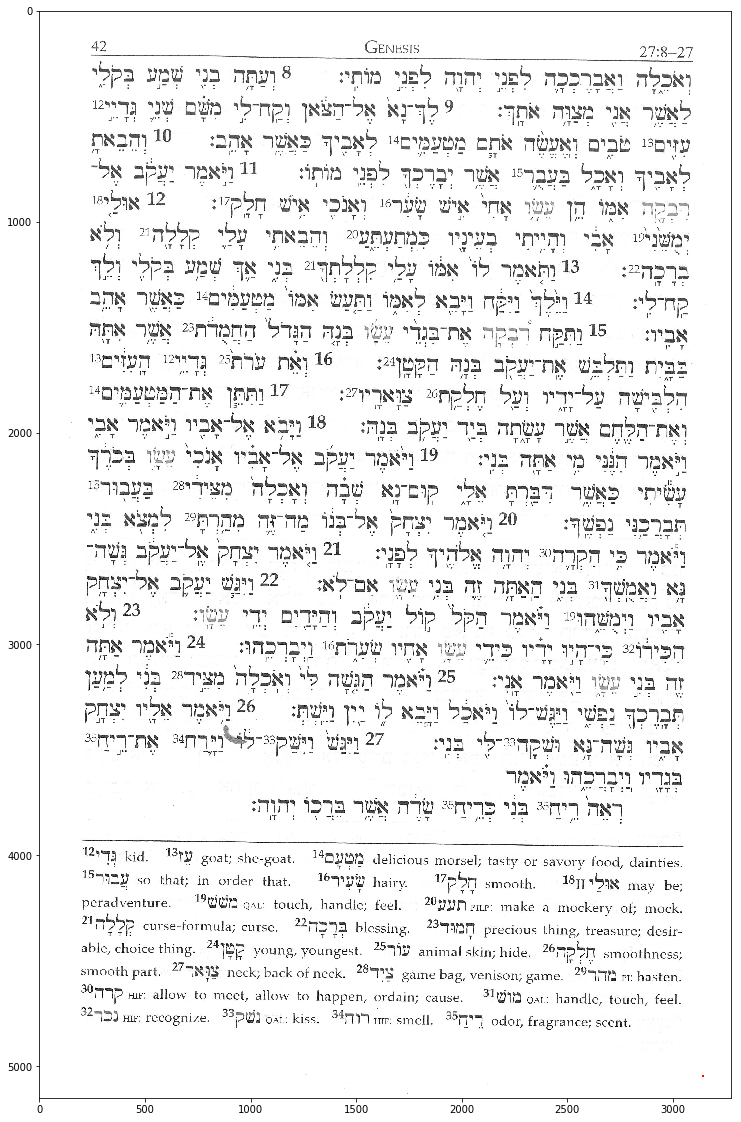

In [112]:
plt.rcParams["figure.figsize"] = (25, 20)

img = cv2.imread('cut/05-06.0000008.jpg')
gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray.copy(), 200, 255, cv2.THRESH_BINARY_INV)[1]
#thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#ret,thresh = cv2.threshold(img,127,255,0)
_, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

hulls = []
for cnt in contours:
    hull = cv2.convexHull(cnt)
    print(hull)
    break

cnt = contours[1]
print(cnt)
image = cv2.drawContours(img.copy(), cnt, -1, (255, 0, 0), 7)

plt.imshow(image)
plt.show()